In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('labeled_data.csv')

In [3]:
df

,First,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,@mayasolovely: As a woman you shouldn't compl...
1,1,3,0,3,0,1,@mleew17: boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,@UrKindOfBrand Dawg!!!! RT @80sbaby4life: You...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,@ShenikaRoberts: The shit you hear about me m...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df.drop(columns = ['First','count'],inplace=True)

In [5]:
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,@mayasolovely: As a woman you shouldn't compl...
1,0,3,0,1,@mleew17: boy dats cold...tyga dwn bad for cu...
2,0,3,0,1,@UrKindOfBrand Dawg!!!! RT @80sbaby4life: You...
3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,1,@ShenikaRoberts: The shit you hear about me m...
...,...,...,...,...,...
24778,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
df['class'].replace({0:'Bad',1:'Bad',2:'Good'},inplace=True)
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,Good,@mayasolovely: As a woman you shouldn't compl...
1,0,3,0,Bad,@mleew17: boy dats cold...tyga dwn bad for cu...
2,0,3,0,Bad,@UrKindOfBrand Dawg!!!! RT @80sbaby4life: You...
3,0,2,1,Bad,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,Bad,@ShenikaRoberts: The shit you hear about me m...
...,...,...,...,...,...
24778,0,2,1,Bad,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,Good,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,Bad,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,Bad,youu got wild bitches tellin you lies


In [7]:
df.groupby('class').describe()

hate_speech                                               \
            count      mean       std  min  25%  50%  75%  max   
class                                                            
Bad       20620.0  0.324442  0.674819  0.0  0.0  0.0  0.0  7.0   
Good       4163.0  0.062935  0.253524  0.0  0.0  0.0  0.0  3.0   

      offensive_language            ...            neither            \
                   count      mean  ...  75%  max    count      mean   
class                               ...                                
Bad              20620.0  2.847672  ...  3.0  9.0  20620.0  0.085645   
Good              4163.0  0.264233  ...  1.0  4.0   4163.0  2.845544   

                                          
            std  min  25%  50%  75%  max  
class                                     
Bad    0.287201  0.0  0.0  0.0  0.0  4.0  
Good   0.795181  2.0  2.0  3.0  3.0  9.0  

[2 rows x 24 columns]

In [8]:
df['Bad'] = df['class'].apply(lambda x: 1 if x == 'Bad' else 0)

In [9]:
new_df = df[['hate_speech','offensive_language','neither']]
new_df

,hate_speech,offensive_language,neither
0,0,0,3
1,0,3,0
2,0,3,0
3,0,2,1
4,0,6,0
...,...,...,...
24778,0,2,1
24779,0,1,2
24780,0,3,0
24781,0,6,0


In [10]:
cor = new_df.corr()
cor

,hate_speech,offensive_language,neither
hate_speech,1.000000,-0.261808,-0.157599
offensive_language,-0.261808,1.000000,-0.684406
neither,-0.157599,-0.684406,1.000000


<AxesSubplot:>

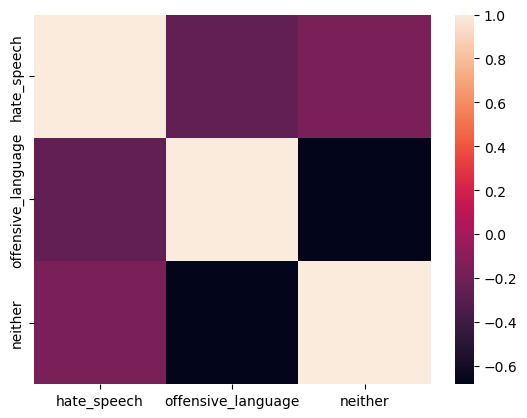

In [11]:
sns.heatmap(data=cor)

<AxesSubplot:>

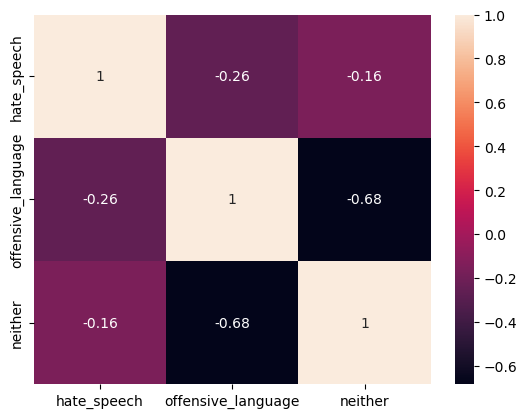

In [12]:
sns.heatmap(data=cor, annot=True)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.tweet, df.Bad, test_size = 0.20)

In [14]:
x_train

22786                             Where's my money, bitch?
14756    RT @CommonBlackGirI: When a hoe says hi to bae...
10336    I got 99 problems and a bitch ain't one...\nSh...
15483    RT @HighSchoolSuckz: i am that horrible friend...
22565    Well isnt that a bitch 2 wildcards are going t...
                               ...                        
556      "Stop being a pussy, son, and shove that needl...
4189                         @MrWoofless Don't be a bitch.
22701    When her pussy stank RT @BasedGodTobi: When yo...
10922    I swear girls with good pussy think that's the...
14093    RT @ATypicalFemaIe: when a bitch gets smart an...
Name: tweet, Length: 19826, dtype: object

In [15]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [16]:
x_train_count

<19826x30989 sparse matrix of type '<class 'numpy.int64'>'
	with 259429 stored elements in Compressed Sparse Row format>

In [17]:
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [18]:
badMessage = ["Fuck you"]
badMessage_count = cv.transform(badMessage)
model.predict(badMessage_count)

array([1], dtype=int64)

In [19]:
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

0.9074036715755497

In [30]:
y_pred = model.predict(x_test_count)

In [31]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 435  406]
 [  53 4063]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.52      0.65       841
           1       0.91      0.99      0.95      4116

    accuracy                           0.91      4957
   macro avg       0.90      0.75      0.80      4957
weighted avg       0.91      0.91      0.90      4957



In [20]:
df

,hate_speech,offensive_language,neither,class,tweet,Bad
0,0,0,3,Good,@mayasolovely: As a woman you shouldn't compl...,0
1,0,3,0,Bad,@mleew17: boy dats cold...tyga dwn bad for cu...,1
2,0,3,0,Bad,@UrKindOfBrand Dawg!!!! RT @80sbaby4life: You...,1
3,0,2,1,Bad,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,0,6,0,Bad,@ShenikaRoberts: The shit you hear about me m...,1
...,...,...,...,...,...,...
24778,0,2,1,Bad,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,0,1,2,Good,"you've gone and broke the wrong heart baby, an...",0
24780,0,3,0,Bad,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,0,6,0,Bad,youu got wild bitches tellin you lies,1


In [21]:
print(model.get_params().keys())

dict_keys(['alpha', 'class_prior', 'fit_prior'])


In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
param_grid = {
    "alpha" : [0.6] ,
    "fit_prior" : [False]
}
grid_search = GridSearchCV(model,param_grid,n_jobs=-1,cv=10,scoring='roc_auc')
grid_search.fit(x_train_count, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.6], 'fit_prior': [False]},
             scoring='roc_auc')

In [23]:
grid_scores = grid_search.cv_results_

In [24]:
print(grid_scores)

{'mean_fit_time': array([0.02396731]), 'std_fit_time': array([0.00956069]), 'mean_score_time': array([0.00575616]), 'std_score_time': array([0.0017996]), 'param_alpha': masked_array(data=[0.6],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_fit_prior': masked_array(data=[False],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.6, 'fit_prior': False}], 'split0_test_score': array([0.96055968]), 'split1_test_score': array([0.960172]), 'split2_test_score': array([0.96670875]), 'split3_test_score': array([0.95440332]), 'split4_test_score': array([0.95891892]), 'split5_test_score': array([0.95328055]), 'split6_test_score': array([0.95259584]), 'split7_test_score': array([0.96668492]), 'split8_test_score': array([0.96554399]), 'split9_test_score': array([0.96090361]), 'mean_test_score': array([0.95997716]), 'std_test_score': array([0.00504033]), 'rank_test_score': array([1])}


In [25]:
pd.DataFrame(grid_scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023967,0.009561,0.005756,0.0018,0.6,False,"{'alpha': 0.6, 'fit_prior': False}",0.96056,0.960172,0.966709,0.954403,0.958919,0.953281,0.952596,0.966685,0.965544,0.960904,0.959977,0.00504,1


In [26]:
grid_scores

{'mean_fit_time': array([0.02396731]),
 'std_fit_time': array([0.00956069]),
 'mean_score_time': array([0.00575616]),
 'std_score_time': array([0.0017996]),
 'param_alpha': masked_array(data=[0.6],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_fit_prior': masked_array(data=[False],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.6, 'fit_prior': False}],
 'split0_test_score': array([0.96055968]),
 'split1_test_score': array([0.960172]),
 'split2_test_score': array([0.96670875]),
 'split3_test_score': array([0.95440332]),
 'split4_test_score': array([0.95891892]),
 'split5_test_score': array([0.95328055]),
 'split6_test_score': array([0.95259584]),
 'split7_test_score': array([0.96668492]),
 'split8_test_score': array([0.96554399]),
 'split9_test_score': array([0.96090361]),
 'mean_test_score': array([0.95997716]),
 'std_test_score': array([0.00504033]),
 'rank_test_score': array([1])}